In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

%matplotlib notebook

from pandasql import sqldf
pysqldf = lambda q:sqldf(q,globals())

In [29]:
custd = pd.read_excel('CUSTOMER_DETAILS.xlsx',index_col='User_ID')
locd = pd.read_excel('LOCATIONS_DETAILS.xlsx')
prod = pd.read_csv('PRODUCT_DETAILS.csv')

In [3]:
custd.shape

(537577, 4)

In [5]:
prod.shape

(537577, 6)

In [35]:
df1 = custd.index.map(locd['User_ID'])

In [36]:
df2 =  locd.index.map(prod['User_ID'])

In [37]:
df1

Float64Index([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
              ...
              nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
             dtype='float64', name='User_ID', length=537577)

In [2]:
bf = pd.read_csv('BlackFriday.csv')
bf.shape

(537577, 12)

In [3]:
bf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [4]:
bf.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [5]:
bf.nunique()

User_ID                        5891
Product_ID                     3623
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Product_Category_2               17
Product_Category_3               15
Purchase                      17959
dtype: int64

In [6]:
bf

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [4]:
x=pd.pivot_table(bf,index=['Product_Category_1'],aggfunc=('mean','sum','count'))['Purchase']

In [5]:
x.sort_index()

,count,mean,sum
Product_Category_1,,,
1,138353.0,13607.701495,1.882666e+09
2,23499.0,11255.680752,2.644972e+08
3,19849.0,10096.841705,2.004122e+08
4,11567.0,2328.862886,2.693796e+07
5,148592.0,6238.004045,9.269175e+08
6,20164.0,15837.893573,3.193553e+08
7,3668.0,16373.830153,6.005921e+07
8,112132.0,7497.354850,8.406934e+08
9,404.0,15538.297030,6.277472e+06


In [38]:
bf['Product_ID'].value_counts()

P00265242    1858
P00110742    1591
P00025442    1586
P00112142    1539
P00057642    1430
P00184942    1424
P00046742    1417
P00058042    1396
P00059442    1384
P00145042    1384
P00237542    1374
P00255842    1354
P00117942    1346
P00110942    1336
P00010742    1331
P00110842    1260
P00220442    1253
P00051442    1233
P00102642    1228
P00117442    1227
P00278642    1213
P00242742    1194
P00034742    1188
P00080342    1186
P00148642    1179
P00028842    1172
P00031042    1168
P00251242    1167
P00114942    1162
P00270942    1141
             ... 
P00314742       1
P00203242       1
P00348142       1
P00126742       1
P00364342       1
P00132742       1
P00104042       1
P00022042       1
P00339142       1
P00353042       1
P00074842       1
P00133042       1
P00074542       1
P00104342       1
P00206242       1
P00012342       1
P00208642       1
P00013442       1
P00307242       1
P00166442       1
P00340742       1
P00298842       1
P00077242       1
P00204442       1
P00224642 

In [7]:
bf.Purchase[bf.Gender == 'M'].sum()

3853044357

In [ ]:
bf.Purchase.

In [7]:
bf.Purchase[bf.Gender == 'F'].sum()

1164624021

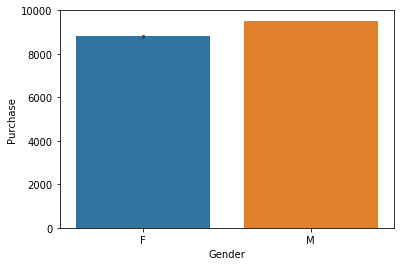

In [4]:
sns.barplot(x=bf.Gender,y=bf.Purchase);

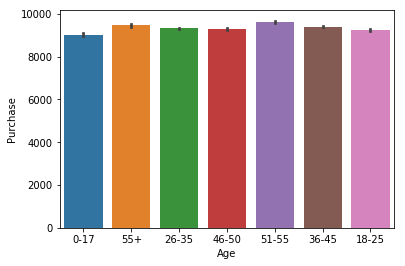

In [5]:
sns.barplot(x=bf.Age,y=bf.Purchase);

In [12]:
upbf = pd.pivot_table(bf,index=['Product_ID'],aggfunc='mean')

In [13]:
product = upbf.sort_values(by = 'Purchase',ascending=False )['Purchase']
product

Product_ID
P00086242    21297.865672
P00085342    20993.804428
P00200642    20479.229885
P00116142    20478.264753
P00119342    20454.296053
P00117642    20453.368557
P00074542    20323.000000
P00341542    20291.000000
P00052842    20136.811983
P00087042    20079.646809
P00202242    19930.850000
P00107342    19813.800000
P00311242    19617.533333
P00188642    19539.121212
P00273342    19265.310345
P00308042    19206.000000
P00272342    18944.500000
P00306742    18943.750000
P00071442    18938.128276
P00071042    18602.842105
P00315142    18468.000000
P00075042    18456.000000
P00005042    18310.929843
P00255842    18207.121123
P00106642    18179.686667
P00159542    18151.063655
P00124742    18144.095960
P00072242    18059.468750
P00172242    18048.666667
P00286342    18008.150943
                 ...     
P00202542      766.516484
P00087142      742.918182
P00149342      741.828390
P00227542      741.764368
P00283142      735.080268
P00309042      726.000000
P00238742      698.172131
P

In [69]:
pbf = pd.pivot_table(bf,index=['Product_ID'],aggfunc=pd.Series.nunique)

In [70]:
product1 = pbf.sort_values(by = 'User_ID',ascending=False )[['User_ID']]
product1

,User_ID
Product_ID,
P00265242,1858
P00110742,1591
P00025442,1586
P00112142,1539
P00057642,1430
P00184942,1424
P00046742,1417
P00058042,1396
P00145042,1384


In [9]:
product['peoplewhobought'] = product.index.map(product1['User_ID'])

In [24]:
product['Price paid per person'] = product.Purchase/product.peoplewhobought
product.sort_values('Price paid per person',ascending=False)

,Purchase,peoplewhobought,Price paid per person
Product_ID,,,
P00086242,5707828,268,21297.865672
P00085342,11378642,542,20993.804428
P00200642,5345079,261,20479.229885
P00116142,12839872,627,20478.264753
P00119342,6218106,304,20454.296053
P00117642,7935907,388,20453.368557
P00074542,20323,1,20323.000000
P00341542,20291,1,20291.000000
P00052842,19492434,968,20136.811983


In [13]:
gbf = pd.pivot_table(bf,index=['Gender'],aggfunc=pd.Series.nunique)

In [18]:
gbf.loc[['M','F']][['User_ID']]

,User_ID
Gender,
M,4225
F,1666


In [25]:
gbfsum = pd.pivot_table(bf,index=['Gender'],aggfunc='sum')
gbfsum.Purchase

Gender
F    1164624021
M    3853044357
Name: Purchase, dtype: int64

In [21]:
abf = pd.pivot_table(bf,index=['Age'],aggfunc=pd.Series.nunique)
abf.User_ID

Age
0-17      218
18-25    1069
26-35    2053
36-45    1167
46-50     531
51-55     481
55+       372
Name: User_ID, dtype: int64

In [26]:
abfsum = pd.pivot_table(bf,index=['Age'],aggfunc='mean')
abfsum.Purchase

Age
0-17     9020.126878
18-25    9235.197575
26-35    9314.588970
36-45    9401.478758
46-50    9284.872277
51-55    9620.616620
55+      9453.898579
Name: Purchase, dtype: float64

In [22]:
agbf = pd.pivot_table(bf,index=['Gender','Age'],aggfunc=pd.Series.nunique)
agbf.User_ID

Gender  Age  
F       0-17       78
        18-25     287
        26-35     545
        36-45     333
        46-50     182
        51-55     142
        55+        99
M       0-17      140
        18-25     782
        26-35    1508
        36-45     834
        46-50     349
        51-55     339
        55+       273
Name: User_ID, dtype: int64

In [28]:
agbfsum = pd.pivot_table(bf,index=['Gender','Age'],aggfunc='sum')
agbfsum.Purchase

Gender  Age  
F       0-17       41826615
        18-25     202209450
        26-35     433857680
        36-45     239010480
        46-50     114796993
        51-55      87972407
        55+        44950396
M       0-17       90832391
        18-25     699459830
        26-35    1565891426
        36-45     771639085
        46-50     298621230
        51-55     273935949
        55+       152664446
Name: Purchase, dtype: int64

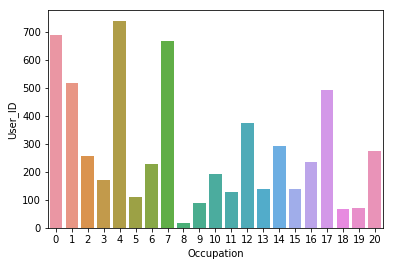

In [46]:
occount = pd.pivot_table(bf,index=['Occupation'],aggfunc=pd.Series.nunique)
sns.barplot(occount.index,occount.User_ID);

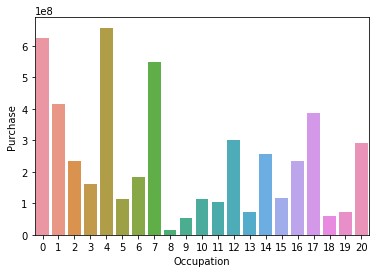

In [58]:
occsum = pd.pivot_table(bf,index=['Occupation'],aggfunc='sum')
sns.barplot(occsum.index,occsum.Purchase);


In [44]:
bf[bf['Product_Category_1']==1 and bf['Product_Category_2']==2]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [42]:
prodcount =  pd.pivot_table(bf,index=['Product_Category_1','Product_Category_2','Product_Category_3'],aggfunc=pd.Series.nunique)
prodcount

Age  City_Category  \
Product_Category_1 Product_Category_2 Product_Category_3                       
1                  2.0                3.0                   7              3   
                                      4.0                   7              3   
                                      5.0                   7              3   
                                      6.0                   7              3   
                                      8.0                   7              3   
                                      9.0                   7              3   
                                      11.0                  7              3   
                                      13.0                  7              3   
                                      14.0                  7              3   
                                      15.0                  7              3   
                                      16.0                  7              3   
                                      17.0                  7              3   
                                      18.0                  7              3   
                   3.0                4.0                   7              3   
                   4.0                9.0                   7              3   
                   5.0                6.0                   7              3   
                                      8.0                   7              3   
                                      9.0                   6              3   
                                      12.0                  7              3   
                                      14.0                  7              3   
                                      15.0                  7              3   
                                      17.0                  7              3   
                                      18.0                  7              3   
                   6.0                8.0                   7              3   
                                      13.0                  7              3   
                                      14.0                  7              3   
                                      15.0                  7              3   
                                      16.0                  7              3   
                   8.0                9.0                   7              3   
                                      13.0                  7              3   
...                                                       ...            ...   
6                  8.0                13.0                  7              3   
                                      14.0                  7              3   
                                      15.0                  7              3   
                                      16.0                  7              3   
                   10.0               13.0                  7              3   
                                      16.0                  7              3   
                   11.0               13.0                  7              3   
                                      16.0                  7              3   
8                  9.0                14.0                  7              3   
                   10.0               16.0                  6              3   
                   11.0               16.0                  5              3   
                   12.0               17.0                  7              3   
                   13.0               14.0                  7              3   
                                      15.0                  7              3   
                                      16.0                  7              3   
                   14.0               15.0                  6              3   
                                      16.0                  7              3   
                                      17.0                

In [16]:
prodcount.User_ID.sum()

106016

In [23]:
occpurchase =  pd.pivot_table(bf,index=['Age','Occupation'],aggfunc='sum').sort_values(by = 'Purchase',ascending=False)['Purchase']
occpurchase

Age    Occupation
18-25  4             436518213
26-35  0             307977307
       7             218826393
       4             200481491
36-45  7             174621962
26-35  1             166002573
       17            165670680
       12            147648394
       14            124228192
36-45  0             123192302
26-35  20            120286113
       2             113699330
36-45  17             96376007
0-17   10             95728496
36-45  1              82341827
18-25  0              82053195
36-45  16             73205800
26-35  3              71745646
36-45  20             66965420
       12             65785516
26-35  6              65737974
       15             64895979
46-50  7              63176388
26-35  16             62658307
46-50  1              62357670
26-35  5              56849330
36-45  14             54292161
51-55  7              52652456
26-35  11             45716014
18-25  20             45605691
                       ...    
36-45  13            

In [21]:
bf1 = pd.get_dummies(bf.drop(['User_ID','Product_ID'],axis=1))
bf1

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,10,0,3,NaN,NaN,8370,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
1,10,0,1,6.0,14.0,15200,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,10,0,12,NaN,NaN,1422,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
3,10,0,12,14.0,NaN,1057,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,16,0,8,NaN,NaN,7969,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
5,15,0,1,2.0,NaN,15227,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
6,7,1,1,8.0,17.0,19215,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
7,7,1,1,15.0,NaN,15854,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
8,7,1,1,16.0,NaN,15686,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
9,20,1,8,NaN,NaN,7871,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0


In [44]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4).fit(bf1.drop(['Product_Category_1','Product_Category_2', 'Product_Category_3'],axis=1))
centroids = kmeans.cluster_centers_
print(centroids)



[[8.14320304e+00 4.12047898e-01 1.12769839e+04 2.37085818e-01
  7.62914182e-01 2.74629509e-02 1.78137042e-01 3.91829890e-01
  2.02848987e-01 8.33875055e-02 7.38343555e-02 4.24992699e-02
  2.61062906e-01 4.18002129e-01 3.20934965e-01 1.35656614e-01
  3.53570184e-01 1.83591947e-01 1.71174736e-01 1.56006520e-01]
 [7.94249427e+00 4.03836272e-01 3.72685180e+03 2.59834186e-01
  7.40165814e-01 3.14448526e-02 1.95096137e-01 4.06650970e-01
  1.94099105e-01 7.93714097e-02 6.01823801e-02 3.31551458e-02
  2.94507888e-01 4.37298197e-01 2.68193915e-01 1.36976846e-01
  3.55395860e-01 1.82364806e-01 1.73061732e-01 1.52200756e-01]
 [8.32689938e+00 4.06041524e-01 1.73802016e+04 1.93876340e-01
  8.06123660e-01 2.49691992e-02 1.78535250e-01 4.00063883e-01
  2.03796486e-01 7.99087383e-02 7.43874059e-02 3.83390372e-02
  2.34916724e-01 4.04143281e-01 3.60939995e-01 1.30485969e-01
  3.50107232e-01 1.90116359e-01 1.74939539e-01 1.54350901e-01]
 [8.00491456e+00 4.11950572e-01 7.47016201e+03 2.71104914e-01
  7.2

In [45]:
labels = kmeans.labels_
labels

array([3, 2, 1, ..., 3, 3, 3])

In [95]:
bf1

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,10,0,3,NaN,NaN,8370,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
1,10,0,1,6.0,14.0,15200,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,10,0,12,NaN,NaN,1422,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
3,10,0,12,14.0,NaN,1057,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,16,0,8,NaN,NaN,7969,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
5,15,0,1,2.0,NaN,15227,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
6,7,1,1,8.0,17.0,19215,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
7,7,1,1,15.0,NaN,15854,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
8,7,1,1,16.0,NaN,15686,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
9,20,1,8,NaN,NaN,7871,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0


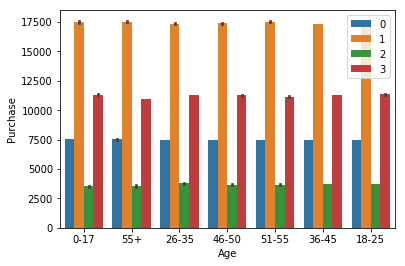

In [88]:
sns.barplot(y = bf['Purchase'], x = bf['Age'], hue=labels)
plt.show()

In [80]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(bf1.drop(['Product_Category_1','Product_Category_2', 'Product_Category_3'],axis=1))
    wcss.append(kmeans.inertia_)

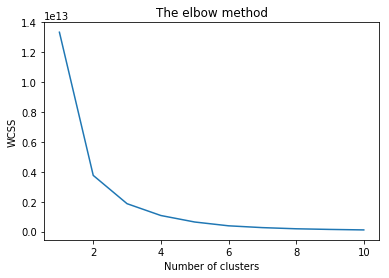

In [81]:
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

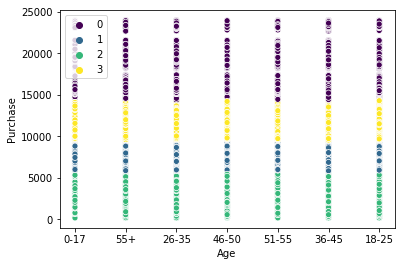

In [15]:
sns.scatterplot(bf['Age'],bf1['Purchase'], hue=labels,palette='viridis');

In [48]:
bf['clusters'] = labels


C:\Users\Shyam Sundar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Shyam Sundar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Shyam Sundar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Shyam Sundar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Shyam Sundar\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, ou

<Figure size 1080x1080 with 0 Axes>

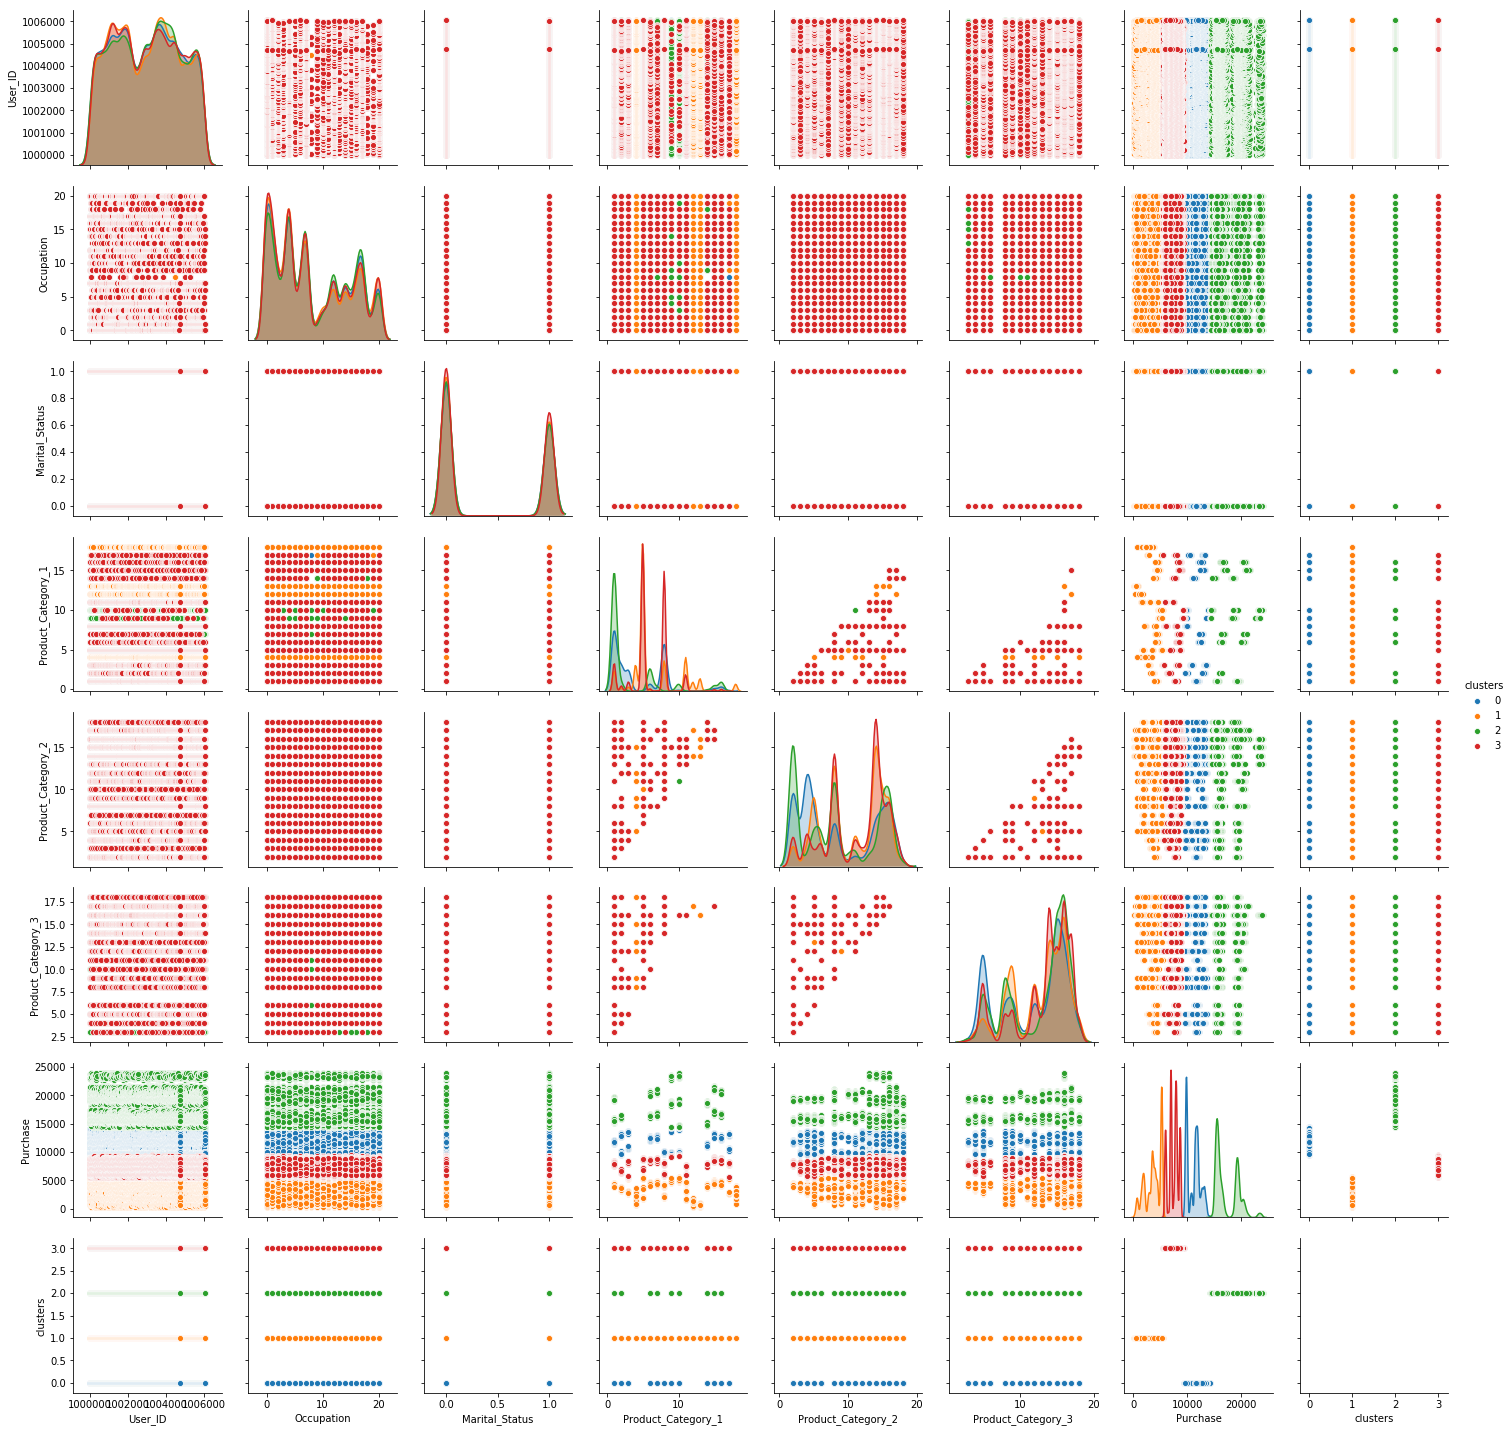

In [50]:
plt.figure(figsize=(15,15))
sns.pairplot(bf,hue='clusters')

In [48]:
grouped = bf.groupby(['User_ID','Product_ID']).size().reset_index(name='count')
df =  grouped.sort_values('User_ID', ascending=False)

df.head()

,User_ID,Product_ID,count
537576,1006040,P00349442,1
537461,1006040,P00112442,1
537469,1006040,P00115842,1
537468,1006040,P00115742,1
537467,1006040,P00114942,1


In [30]:
basket = (df.groupby(['User_ID','Product_ID'])['count']
          .sum().unstack().reset_index().fillna(0)
          .set_index('User_ID'))

#The encoding function
#encoding function will convert all the postive values into 1 and negative values into 0
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    
#apply the function here for the dataset    
basket_sets = basket.applymap(encode_units)
# basket_sets

In [74]:
basket_sets.shape

(5891, 3623)

In [31]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import mlxtend as ml

In [62]:
frequent_itemsets = apriori(basket_sets, min_support=0.03, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift",min_threshold=1)
rules.sort_values('confidence', ascending = False, inplace = True)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
25666,"(P00057942, P00046742)",(P00110742),0.054320,0.270073,0.032083,0.590625,2.186909,0.017412,1.783028
23908,"(P00111742, P00110742)",(P00025442),0.052453,0.269224,0.030725,0.585761,2.175735,0.016603,1.764138
26696,"(P00270942, P00102642)",(P00057642),0.064335,0.242743,0.037685,0.585752,2.413052,0.022068,1.828028
27380,"(P00270942, P00329542)",(P00057642),0.056357,0.242743,0.032762,0.581325,2.394816,0.019082,1.808700
26474,"(P00057642, P00057942)",(P00110742),0.054490,0.270073,0.031234,0.573209,2.122421,0.016518,1.710267
27382,"(P00057642, P00329542)",(P00270942),0.057206,0.193685,0.032762,0.572700,2.956860,0.021682,1.887000
25730,"(P00062842, P00110742)",(P00046742),0.059582,0.240536,0.033441,0.561254,2.333341,0.019109,1.730985
24310,"(P00243942, P00112142)",(P00025442),0.054150,0.269224,0.030385,0.561129,2.084242,0.015807,1.665125
23018,"(P00010742, P00120042)",(P00110942),0.058394,0.226787,0.032762,0.561047,2.473896,0.019519,1.761493
29144,"(P0097242, P00120042)",(P00110942),0.056018,0.226787,0.031404,0.560606,2.471954,0.018700,1.759727


In [63]:
rules.to_excel('association_by_confidence.xlsx')

In [ ]:
rules.shape

In [67]:
frequent_itemsets.sort_values('support',ascending=False).head()

,support,itemsets
726,0.315396,(P00265242)
262,0.270073,(P00110742)
68,0.269224,(P00025442)
273,0.261246,(P00112142)
149,0.242743,(P00057642)


In [71]:
rules.sort_values('support', ascending = False).head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2864,(P00025442),(P00110742),0.269224,0.270073,0.117637,0.436948,1.617890,0.044927,1.296377
2865,(P00110742),(P00025442),0.270073,0.269224,0.117637,0.435575,1.617890,0.044927,1.294726
12522,(P00112142),(P00110742),0.261246,0.270073,0.109998,0.421053,1.559033,0.039443,1.260783
12523,(P00110742),(P00112142),0.270073,0.261246,0.109998,0.407291,1.559033,0.039443,1.246403
2884,(P00025442),(P00112142),0.269224,0.261246,0.103887,0.385876,1.477062,0.033554,1.202940


In [73]:
# Association rules to find the lift value
rules1 = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules1.sort_values('lift', ascending = False, inplace = True)
rules1.head(5)  

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9621,(P00106742),(P00070942),0.081141,0.062977,0.030555,0.376569,5.979429,0.025445,1.503009
9620,(P00070942),(P00106742),0.062977,0.081141,0.030555,0.485175,5.979429,0.025445,1.784800
4293,(P00220142),(P00032042),0.072653,0.092344,0.033950,0.467290,5.060301,0.027241,1.703845
4292,(P00032042),(P00220142),0.092344,0.072653,0.033950,0.367647,5.060301,0.027241,1.466502
4269,(P00127442),(P00032042),0.089798,0.092344,0.041928,0.466919,5.056283,0.033636,1.702659


In [ ]:
These are the top 

In [53]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

import networkx as nx

nx_data=rules[rules.lift>=3]
GA=nx.from_pandas_edgelist(nx_data,source='antecedents',target='consequents',edge_attr='lift')
pos=nx.kamada_kawai_layout(GA,weight='lift')
# pos = nx.nx_agraph.graphviz_layout(GA)
# pos = nx.nx_agraph.graphviz_layout(GA, prog='dot')

edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5,color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in GA.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=2)))

for node in GA.nodes():
    x, y = pos[node]
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])

for node,adjacencies in enumerate(GA.adjacency()):
    node_trace['marker']['color']+=tuple([len(adjacencies[1])])
    node_info = str(adjacencies[0])+' - # of connections: '+str(len(adjacencies[1]))
    node_trace['text']+=tuple([node_info])

fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph',
                titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plot.ly/ipython-notebooks/network-graphs/'> https://plot.ly/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

iplot(fig, filename='networkx')

In [61]:
x = bf1.drop(['Product_Category_1','Product_Category_2', 'Product_Category_3','Purchase'],axis=1)
y = bf1['Purchase']
x.Occupation = x.Occupation.astype('category')

x = pd.get_dummies(x,drop_first=True)
x.columns

Index(['Marital_Status', 'Gender_F', 'Gender_M', 'Age_0-17', 'Age_18-25',
       'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55', 'Age_55+',
       'City_Category_A', 'City_Category_B', 'City_Category_C',
       'Stay_In_Current_City_Years_0', 'Stay_In_Current_City_Years_1',
       'Stay_In_Current_City_Years_2', 'Stay_In_Current_City_Years_3',
       'Stay_In_Current_City_Years_4+', 'Occupation_1', 'Occupation_2',
       'Occupation_3', 'Occupation_4', 'Occupation_5', 'Occupation_6',
       'Occupation_7', 'Occupation_8', 'Occupation_9', 'Occupation_10',
       'Occupation_11', 'Occupation_12', 'Occupation_13', 'Occupation_14',
       'Occupation_15', 'Occupation_16', 'Occupation_17', 'Occupation_18',
       'Occupation_19', 'Occupation_20'],
      dtype='object')

In [62]:
##Train test split
from sklearn.model_selection import train_test_split
seed = 7
np.random.seed(seed)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 123)

In [63]:
lr = LinearRegression()

In [64]:
model = lr.fit(x,y)
ypred = lr.predict(x)
ypred

array([ 8152.5078125,  8152.5078125,  8152.5078125, ..., 10064.3984375,
       10064.3984375, 10064.3984375])

In [65]:
lr.score(x,y)

0.011451174332517742

In [66]:
import statsmodels.api as sm
X = sm.add_constant(x)
model = sm.OLS(y,X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     183.1
Date:                Sat, 06 Jul 2019   Prob (F-statistic):               0.00
Time:                        21:25:21   Log-Likelihood:            -5.3363e+06
No. Observations:              537577   AIC:                         1.067e+07
Df Residuals:                  537542   BIC:                         1.067e+07
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         -4.443e+14    3.7e+14     -1.201      0.230   -1.17e+15    2.81e+14
Marital_Status                  -66.7167     14.781     -4.514      0.000     -95.687     -37.747
Gender_F                      -2.541e+14   2.09e+14     -1.219      0.223   -6.63e+14    1.55e+14
Gender_M                      -2.541e+14   2.09e+14     -1.219      0.223   -6.63e+14    1.55e+14
Age_0-17                      -1.792e+14   2.83e+14     -0.634      0.526   -7.33e+14    3.75e+14
Age_18-25                     -1.792e+14   2.83e+14     -0.634      0.526   -7.33e+14    3.75e+14
Age_26-35                     -1.792e+14   2.83e+14     -0.634      0.526   -7.33e+14    3.75e+14
Age_36-45                     -1.792e+14   2.83e+14     -0.634      0.526   -7.33e+14    3.75e+14
Age_46-50                     -1.792e+14   2.83e+14     -0.634      0.526   -7.33e+14    3.75e+14
Age_51-55                     -1.792e+14   2.83e+14     -0.634      0.526   -7.33e+14    3.75e+14
Age_55+                       -1.792e+14   2.83e+14     -0.634      0.526   -7.33e+14    3.75e+14
City_Category_A                3.756e+14   3.83e+14      0.981      0.327   -3.75e+14    1.13e+15
City_Category_B                3.756e+14   3.83e+14      0.981      0.327   -3.75e+14    1.13e+15
City_Category_C                3.756e+14   3.83e+14      0.981      0.327   -3.75e+14    1.13e+15
Stay_In_Current_City_Years_0    5.02e+14   5.67e+14      0.886      0.376   -6.09e+14    1.61e+15
Stay_In_Current_City_Years_1    5.02e+14   5.67e+14      0.886      0.376   -6.09e+14    1.61e+15
Stay_In_Current_City_Years_2    5.02e+14   5.67e+14      0.886      0.376   -6.09e+14    1.61e+15
Stay_In_Current_City_Years_3    5.02e+14   5.67e+14      0.886      0.376   -6.09e+14    1.61e+15
Stay_In_Current_City_Years_4+   5.02e+14   5.67e+14      0.886      0.376   -6.09e+14    1.61e+15
Occupation_1                   -111.1040     30.165     -3.683      0.000    -170.227     -51.981
Occupation_2                    -50.9728     36.299     -1.404      0.160    -122.119      20.173
Occupation_3                    176.5995     42.312      4.174      0.000      93.670     259.529
Occupation_4                    186.4079     28.858      6.459      0.000     129.847     242.969
Occupation_5                    164.5824     49.217      3.344      0.001      68.118     261.046
Occupation_6                    189.7361     40.408      4.695      0.000     110.537     268.935
Occupation_7                    214.0513     28.327      7.556      0.000     158.531     269.572
Occupation_8                    262.4762    128.735      2.039      0.041      10.160     514.793
Occupation_9                   -151.8301     67.141     -2.261      0.024    -283.424     -20.236
Occupation_10                   -97.3245     

In [34]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process




#         linear_model.LogisticRegression(),
ML = [linear_model.LinearRegression(),
   
#     naive_bayes.BernoulliNB(),
#     naive_bayes.GaussianNB(),
    #SVM
#     svm.SVC(probability=True),
#     svm.NuSVC(probability=True),
#     svm.LinearSVC(),

#     neighbors.KNeighborsClassifier(),
#     neighbors.KNeighborsRegressor(),

   
#     tree.DecisionTreeClassifier()
#     tree.DecisionTreeRegressor()
     ]
###############################################   Grid search 
clf = tree.DecisionTreeRegressor()

param_grid = {
    'max_depth': [3, 4, 5,6,7,8,9,10],
    }

scorers = {
#     'precision_score': make_scorer(precision_score),
#     'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}
def grid_search_wrapper(refit_score='accuracy_score',scores=[]):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=10)
    grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)
    grid_search.fit(X_train.values, y_train.values)

    # make the predictions
    y_pred = grid_search.predict(X_test.values)

    print('Best params for Decision tree {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
#     print('\nConfusion matrix of optimized Decision tree for {} on the test data:'.format(refit_score))
#     print(pd.DataFrame(confusion_matrix(y_test, y_pred),
#                  columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    acc = accuracy_score(y_test,y_pred)
    scores.append(acc)
    return grid_search
#############################################################3
def ml(x,y,xt,yt):
    scores = []
    for i in ML:
        if str(i) != str(tree.DecisionTreeClassifier()):
            i.fit(x,y)
            pred = i.predict(xt)
            scores.append(accuracy_score(yt,pred))
        else:
            grid_search_wrapper(refit_score='accuracy_score',scores=scores,x=x,y=y,xt=xt,yt=yt)

    s = pd.DataFrame(pd.Series(scores,index=[type(i).__name__ for i in ML])).rename({0:'Accuracy'},axis=1)
    return s

In [35]:
ml(X_train, y_train,X_test, y_test)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets